<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Transformasi Linier Brightness
Formula: *g(x,y) = f(x,y)+b*
*g(x,y)* adalah nilai pixel setelah transformasi, *f(x,y)* adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


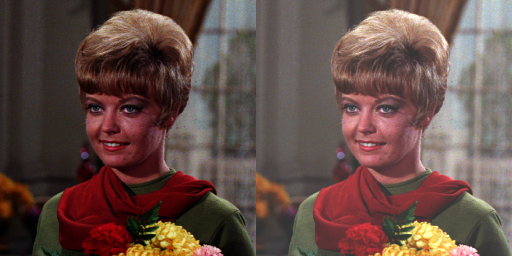

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum


1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

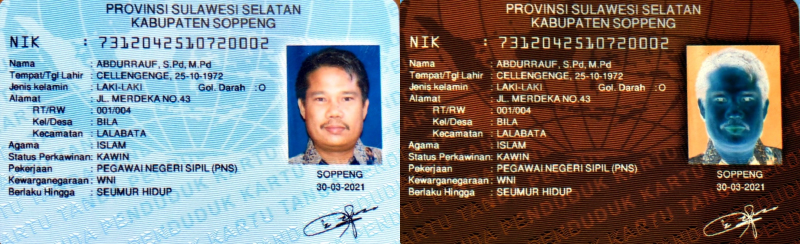

In [3]:
original_ktp = cv.imread('/content/drive/MyDrive/images/KTP7.jpeg')
original_ktp = cv.resize(original_ktp, (0,0), fx=0.5, fy=0.5)

inverse = (255 - original_ktp)
final_frame = cv.hconcat((original_ktp, inverse))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah Kontras dan Tingkat Kecerahan Citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


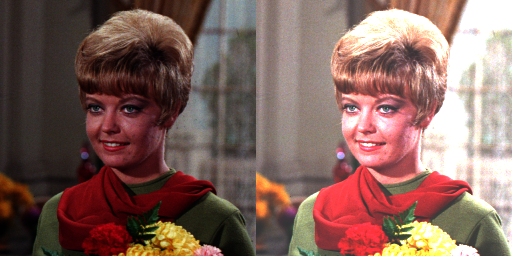

In [4]:
print(' Mengubah Kontras dan Tingkat Kecerahan Citra ')
print('----------------------------------------------')

while True:
  try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    if -255 <= brightness <= 255:
      contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
      if 1.0 <= contrast <= 3.0:
        break
      else:
        print('Persyaratan contrast tidak sesuai!')
    else:
      print('Persyaratan brightness tidak sesuai!')
  except ValueError:
    print('Error, not a number')

# Load the image
original_contrast = cv.imread('/content/drive/MyDrive/images/female.tiff')

# Check if image was loaded correctly
if original_contrast is None:
    print(f'Error: Unable to load image at /content/drive/MyDrive/images/female.tiff')
else:
    # Apply contrast and brightness transformation using OpenCV
    contrast_image = cv.convertScaleAbs(original_contrast, alpha=contrast, beta=brightness)

    # Concatenate original and contrast-adjusted images
    final_frame = cv.hconcat((original_contrast, contrast_image))

    # Display the images
    cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


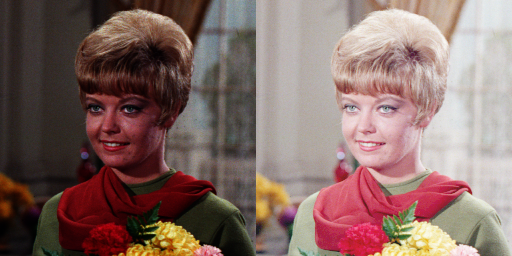

In [5]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try :
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error: Masukkan nilai yang valid untuk kecerahan.')
  brightness = 0

original_img = cv.imread('/content/drive/MyDrive/images/female.tiff')

if original is None:
  print(f'Error: Unable to load image')
else:
  # Konversi image ke float32 for log transformation
  original_float = np.float32(original)

  # transformasi logarithmic
  c = 255 / np.log(1 + np.max(original_float))
  log_transformed = c * np.log(1 + original_float)

  # Konversi kembali ke uint8
  log_transformed = np.uint8(np.clip(log_transformed, 0, 255))

  final_frame = cv.hconcat((original, log_transformed))

  cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [6]:
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/images/KTP7.jpeg')

if original is None:
  print(f'Error: Unable to load image')
else:
  # konversi image ke float32 untuk presisi
  original_float = original.astype(np.float32)

  # method averaging
  averaging_gray = np.mean(original_float, axis=2)

  # method lightness
  max_val = np.max(original_float, axis=2)
  min_val = np.min(original_float, axis=2)
  lightness_gray = (max_val + min_val) / 2

  # method luminance
  luminance_gray = 0.299 * original_float[:, :, 2] + 0.587 * original_float[:, :, 1] + 0.114 * original_float[:, :, 0]

  # konversi grayscale image ke uint8
  averaging_gray = np.uint8(np.clip(averaging_gray, 0, 255))
  lightness_gray = np.uint8(np.clip(lightness_gray, 0, 255))
  luminance_gray = np.uint8(np.clip(luminance_gray, 0, 255))

  # Display hasil menggunakan matplotlib
  plt.figure(figsize=(12,8))
  plt.show()

<Figure size 1200x800 with 0 Axes>

a. Averaging


Text(0.5, 1.0, 'Averaging Method')

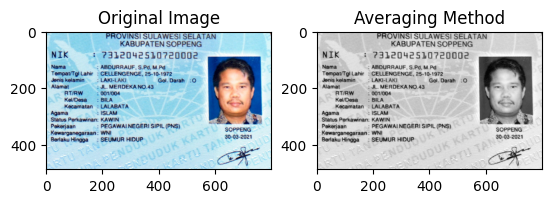

In [7]:
  # Original Image
  print('a. Averaging')
  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.title('Original Image')

  # Averaging Method
  plt.subplot(2, 2, 2)
  plt.imshow(averaging_gray, cmap='gray')
  plt.title('Averaging Method')

b. Lightness


Text(0.5, 1.0, 'Lightness Method')

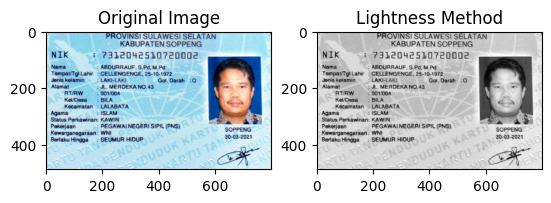

In [8]:
  print('b. Lightness')
  # Original Image
  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.title('Original Image')

  # Lightness Method
  plt.subplot(2, 2, 2)
  plt.imshow(lightness_gray, cmap='gray')
  plt.title('Lightness Method')

c. Luminance


Text(0.5, 1.0, 'Luminance Method')

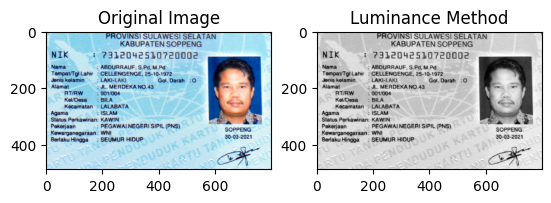

In [9]:
  # Original Image
  print('c. Luminance')
  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.title('Original Image')

  # Luminance Method
  plt.subplot(2, 2, 2)
  plt.imshow(luminance_gray, cmap='gray')
  plt.title('Luminance Method')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

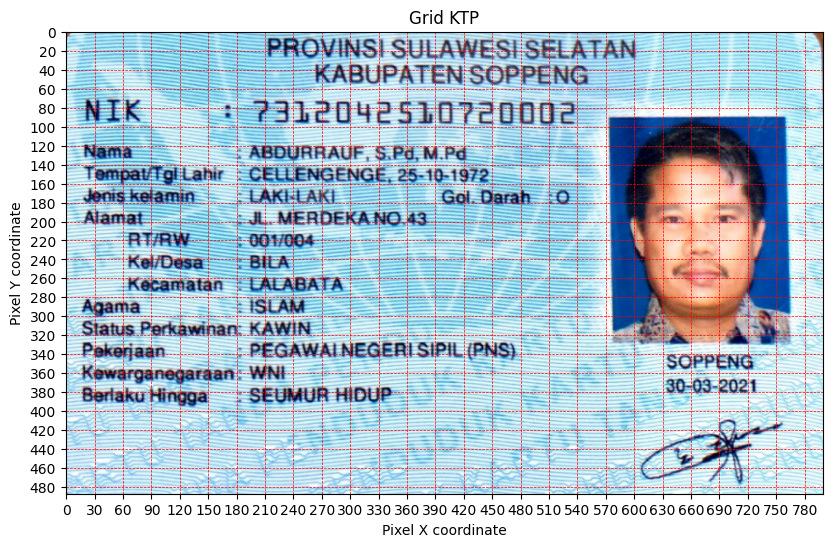

In [16]:
plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

# title grid also label X and Y
plt.title('Grid KTP')
plt.xlabel('Pixel X coordinate')
plt.ylabel('Pixel Y coordinate')

# setup grid
plt.grid(True, which='both', color='r', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))

plt.show()

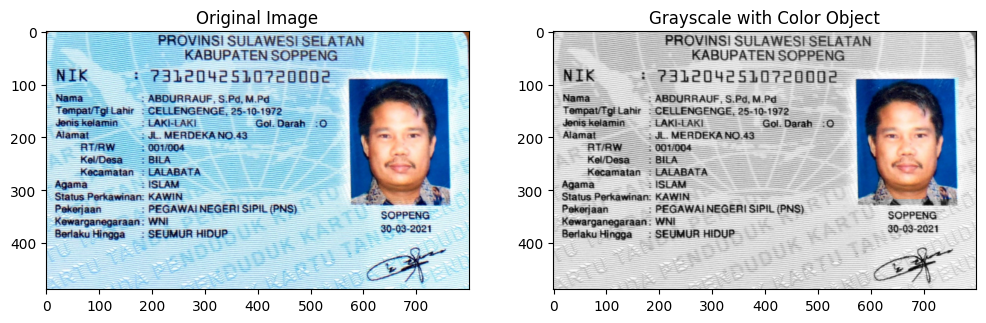

In [23]:
# Define area for object that will remain in color (x_start, y_start, x_end, y_end)
x_start, y_start, x_end, y_end = 573, 88, 767, 318

# Convert the original image to grayscale
gray_ktp = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Convert grayscale image back to 3-channel (BGR) so we can combine it with the color object
gray_ktp_3ch = cv.cvtColor(gray_ktp, cv.COLOR_GRAY2BGR)

# Copy the grayscale image (3-channel) to preserve the object's color
final_image = gray_ktp_3ch.copy()

# Replace the area of object in the grayscale image with the color object from the original
final_image[y_start:y_end, x_start:x_end] = original[y_start:y_end, x_start:x_end]

# Plot both images for comparison
plt.figure(figsize=(12, 8))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Plot the final image with grayscale and color object
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.title('Grayscale with Color Object')

plt.show()